# Analyse en Composantes Principales (ACP)

In [33]:
import pandas as pa
import numpy as np
import collections

In [34]:

def droite2DVd(x, vd, point):
  # vd : la droite de vecteur directeur
  y = None

  λ = x - point[0]

  y = ((λ * vd[1]) / vd[0]) + point[1]

  return y # ordonnées des points

In [35]:
vd = [2, 1]
point = (3, 4)
x = 8

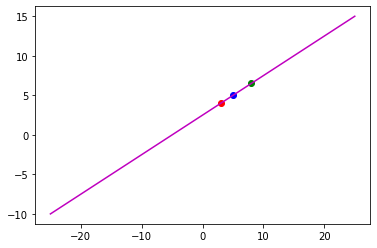

In [36]:
# droite2DVd() test
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(point[0], point[1], c="red")
plt.scatter(point[0] + vd[0], point[1] + vd[1], c="blue")
plt.scatter(x, droite2DVd(x, vd, point), c="green")

X = np.linspace(-25, 25, 100)
Y = [droite2DVd(x, vd, point) for x in X]
plt.plot(X, Y, c="m")


## Exercice 1

In [37]:
dataset = pa.read_csv("https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv", sep=";")
df = pa.DataFrame(dataset)

In [38]:
dataX = dataset[["lightness", "width"]]
dataY = dataset["species"]

In [39]:

def CalculACP(X):
  # 1. calcule la moyenne de l'échantillon
  means = np.mean(X)

  # 2. centrage des données
  Z = X - means

  # 3. calcule la "scatter matrix" avec le theorem de la saucisse le retour
  teacherChange = False
  if (teacherChange):
    X = Z / np.var(X)
    S = (len(X) - 1) * X.cov()
  else:
    S = len(X) * X.cov()

  # 4. calcule des vecteurs propres et des valeurs propres de S
  # lambdas or λ (le valeur propre) and vec or E (vecteur propre)
  lambdas, vec = np.linalg.eig(S)

  # tris
  res = dict(zip(lambdas, vec))
  res = collections.OrderedDict(sorted(res.items(), reverse=True))

  return np.array(list(res.values())) # vecteurs propres triés de la plus grande à la plus petite

# les vecteurs propres = les variances des axes

In [40]:
E = CalculACP(dataX)

print("Vecteur propre :", E)

Vecteur propre : [[ 0.91122236 -0.41191481]
 [ 0.41191481  0.91122236]]


In [41]:
# W matrice de projection
def Projection(W, X):
  # calcule de Z
  means = np.mean(X) # calcule la moyenne de l'échantillon
  Z = X - means # centrage des données

  # 6. Le vecteur recherché est
  y = np.dot(W.T, Z.T) # E.T・z

  return y # projection de X.

In [42]:
# 5. E (vecteur propre)
E = CalculACP(dataX)

# On prend le premier qui a la plus grosse valeur propre
e1 = E[:,0]
e2 = E[:,1]
print(e1)
print(e2)

prjY = Projection(e1, dataX)
prjY

[0.91122236 0.41191481]
[-0.41191481  0.91122236]


array([ 2.25100964, -1.2019596 , -5.42628467, ...,  9.45037968,
        2.56895816,  0.53158506])

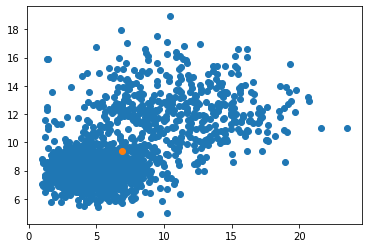

In [43]:
import matplotlib.pyplot as plt
means = np.mean(dataX)
plt.scatter(dataX["lightness"], dataX["width"])
plt.scatter(means["lightness"], means["width"])

10.17020098592207


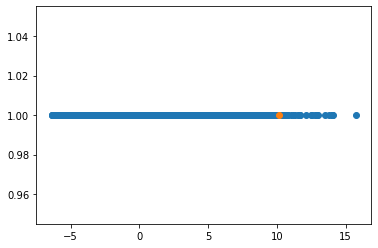

In [44]:
import matplotlib.pyplot as plt

plt.scatter(prjY, np.ones(len(prjY)))
origin = np.dot(e1.T, means.T)
print(origin)
plt.scatter(origin, 1)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=1)
print(len(X_train), str(len(X_train) * 100 / len(X)) + "%")
print(len(X_test), str(len(X_test) * 100 / len(X)) + "%")

1200 1200.0%
300 300.0%


In [46]:
from sklearn.decomposition import PCA
# ACP train
pca = PCA(n_components=1)
pca.fit(X_train.values)
prjY_train = pca.transform(X_train.values)

# ACP test
pca = PCA(n_components=1)
pca.fit(X_test.values)
prjY_test = pca.transform(X_test.values)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### MAP 2D vs MAP ACP

In [48]:
print("MAP 2D :")
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.values, Y_train)

# Evaluate
Y_pred = nb.predict(X_test.values)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

MAP 2D :
[[197   5]
 [  9  89]]
95.33%


In [49]:
print("MAP ACP :")
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(prjY_train, Y_train)

# Evaluate
Y_pred = nb.predict(prjY_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

MAP ACP :
[[195   7]
 [ 14  84]]
93.00%


### k-nn 2D vs k-nn ACP

In [50]:
print("k-nn 2D :")
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train.values, Y_train)

# Evaluate
Y_pred = knn.predict(X_test.values)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

k-nn 2D :
[[197   5]
 [ 11  87]]
94.67%


In [51]:
print("k-nn ACP :")
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(prjY_train, Y_train)

# Evaluate
Y_pred = knn.predict(prjY_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

k-nn ACP :
[[192  10]
 [ 14  84]]
92.00%


## Exercice 2

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [53]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [54]:
X = cancer.data
Y = cancer.target
X.shape

(569, 30)

In [55]:
# centrage des donnée
# means = np.mean(X) # calcule la moyenne de l'échantillon
# X = X - means # centrage des données

print(X)
print(Y)

[[-43.90071234 -51.51071234  60.90928766 ... -61.62531234 -61.43061234
  -61.77181234]
 [-41.32071234 -44.12071234  71.00928766 ... -61.70471234 -61.61571234
  -61.80169234]
 [-42.20071234 -40.64071234  68.10928766 ... -61.64771234 -61.52941234
  -61.80313234]
 ...
 [-45.29071234 -33.81071234  46.40928766 ... -61.74891234 -61.66891234
  -61.81251234]
 [-41.29071234 -32.56071234  78.20928766 ... -61.62571234 -61.48201234
  -61.76671234]
 [-54.13071234 -37.35071234 -13.97071234 ... -61.89071234 -61.60361234
  -61.82032234]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [57]:
prjY = pca.transform(X)
print(prjY.T)

[[ 1.16014257e+03  1.26912244e+03  9.95793889e+02 -4.07180803e+02
   9.30341180e+02 -2.11591259e+02  8.21210900e+02 -2.50899776e+01
  -1.91292834e+02 -2.38292863e+02  3.04687818e+02  4.24361128e+02
   6.34514335e+02  6.30426906e+01 -1.96441210e+02  5.60046828e+01
   2.35858120e+02  4.47392780e+02  1.61509345e+03 -1.91621045e+02
  -2.85051275e+02 -6.83583952e+02  1.12560459e+02  1.87373312e+03
   1.27373066e+03  6.34879769e+02  8.59184126e+00  6.77784526e+02
   3.73719881e+02  4.53678089e+02  9.03981279e+02 -1.03689312e+02
   5.24945203e+02  1.06217159e+03  4.04385934e+02  4.10049756e+02
  -8.06577946e+01 -3.55877850e+02 -1.28973156e+02 -1.70245723e+02
  -1.27994761e+02 -4.62028008e+02  8.97027427e+02 -3.43752015e+01
  -1.84707363e+02  8.07564573e+02 -7.83838668e+02 -1.66757183e+02
  -3.62699507e+02 -2.05111744e+02 -4.30034080e+02 -2.35893530e+02
  -4.16469507e+02  5.76360308e+02  1.57404079e+02 -4.48982719e+02
   1.34213857e+03  9.09989494e+01 -2.86145436e+02 -7.44091835e+02
  -6.16729

### Critère du coude

In [58]:
print(pca.explained_variance_ratio_.sum())

0.9820446715106609


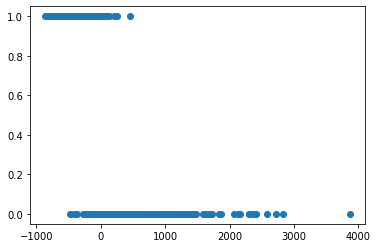

In [59]:
import matplotlib.pyplot as plt
plt.scatter(prjY, Y)

In [60]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
pca.transform(X)
eigval = pca.explained_variance_ # Valeurs propres
print(eigval)

[4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01 3.00458768e+00 1.81533030e+00 3.71466740e-01
 1.55513547e-01 8.40612196e-02 3.16089533e-02 7.49736514e-03
 3.16165652e-03 2.16150395e-03 1.32653879e-03 6.40269304e-04
 3.74883320e-04 2.35169626e-04 1.84583467e-04 1.64180064e-04
 7.81102011e-05 5.76111660e-05 3.49172775e-05 2.83952689e-05
 1.61463677e-05 1.24902419e-05 3.68048171e-06 2.84790425e-06
 2.00491564e-06 7.01997261e-07]


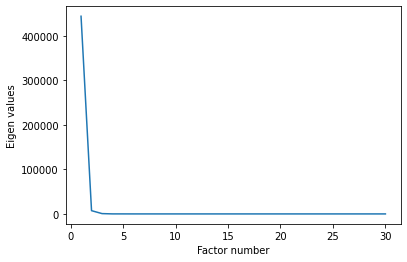

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X.shape[1] + 1),eigval)
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

If faut retenir `2` axes pour garder au moins 80% de la variance.

### 3 axes qualité

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# ACP train
pca = PCA(n_components=3)
pca.fit(X_train)
prjY_train = pca.transform(X_train)

# ACP test
pca = PCA(n_components=3)
pca.fit(X_test)
prjY_test = pca.transform(X_test)

In [63]:
print("MAP without ACP :")
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Evaluate
Y_pred = nb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

MAP without ACP :
[[38  4]
 [ 2 70]]
94.74%


In [64]:
print("MAP ACP :")
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(prjY_train, Y_train)

# Evaluate
Y_pred = nb.predict(prjY_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

MAP ACP :
[[30 12]
 [ 0 72]]
89.47%


On vois qu'on pert en qualité